# K-nearest neighbors project
##### For the course 2022 Python Machine Learning & Data Science Masterclass

For this project, we will use the [Sonar dataset](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)) and create a KNN model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.

In [1]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset exploration

In [2]:
sonar_df = pd.read_csv('data/Sonar.csv')
sonar_df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


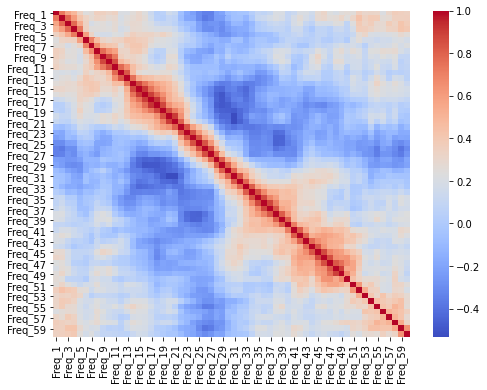

In [3]:
# Plotting a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(sonar_df.corr(), cmap='coolwarm')

In [4]:
sonar_df["Label"].value_counts()

M    111
R     97
Name: Label, dtype: int64

In [5]:
# It would be easier to map the Label(target) values to 0 and 1
sonar_df['Target'] = sonar_df['Label'].map({'R': 0, 'M': 1})
sonar_df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0


In [6]:
# Most correlated features with
np.abs(sonar_df.corr()['Target']).sort_values(ascending=False).head(5)

Target     1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Name: Target, dtype: float64

### Creation of train and test sets

In [7]:
# First we separate features and prediction column
X = sonar_df.drop(["Label", "Target"], axis=1)
y = sonar_df["Target"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

### Creation of Pipeline

We will create a pipeline to scale the features and create the KNN model.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
knn_model = KNeighborsClassifier()

pipe_operations = [('scaler', scaler), ('knn_model', knn_model)]

In [10]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(pipe_operations)

In [11]:
# Now we create a GridSearchCV to tune the hyperparameter (k) of KNN. This GridSearch will use the pipeline

from sklearn.model_selection import GridSearchCV

k_values = list(range(1, 30)) # we will try 30 different values for k
param_grid = {'knn_model__n_neighbors': k_values} 

grid_model = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy") 

In [12]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn_model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
     

In [13]:
# Let's see the best parameters
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn_model',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                        weights='uniform'))],
 'verbose': False,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'knn_model': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                      weights='uniform'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn_model__algorithm': 'auto',
 'knn_model__leaf_size': 30,
 'knn_model__metric': 'minkowski',
 'knn_model__metric_params': None,
 'knn_model__n_jobs': None,
 'knn_model__n_neighbors': 1,
 'knn_model__p': 2,
 'knn_model__weights': 'uniform'}

In [14]:
# Let's check the mean test score for each k
accuracy_k = grid_model.cv_results_['mean_test_score']
accuracy_k

array([0.83448276, 0.8137931 , 0.77241379, 0.77931034, 0.75172414,
       0.75172414, 0.74482759, 0.75172414, 0.72413793, 0.70344828,
       0.73103448, 0.71034483, 0.71724138, 0.71034483, 0.71034483,
       0.71034483, 0.71034483, 0.68965517, 0.67586207, 0.68275862,
       0.68965517, 0.71034483, 0.67586207, 0.71724138, 0.71724138,
       0.69655172, 0.68275862, 0.68275862, 0.70344828])

Text(0, 0.5, 'Accuracy')

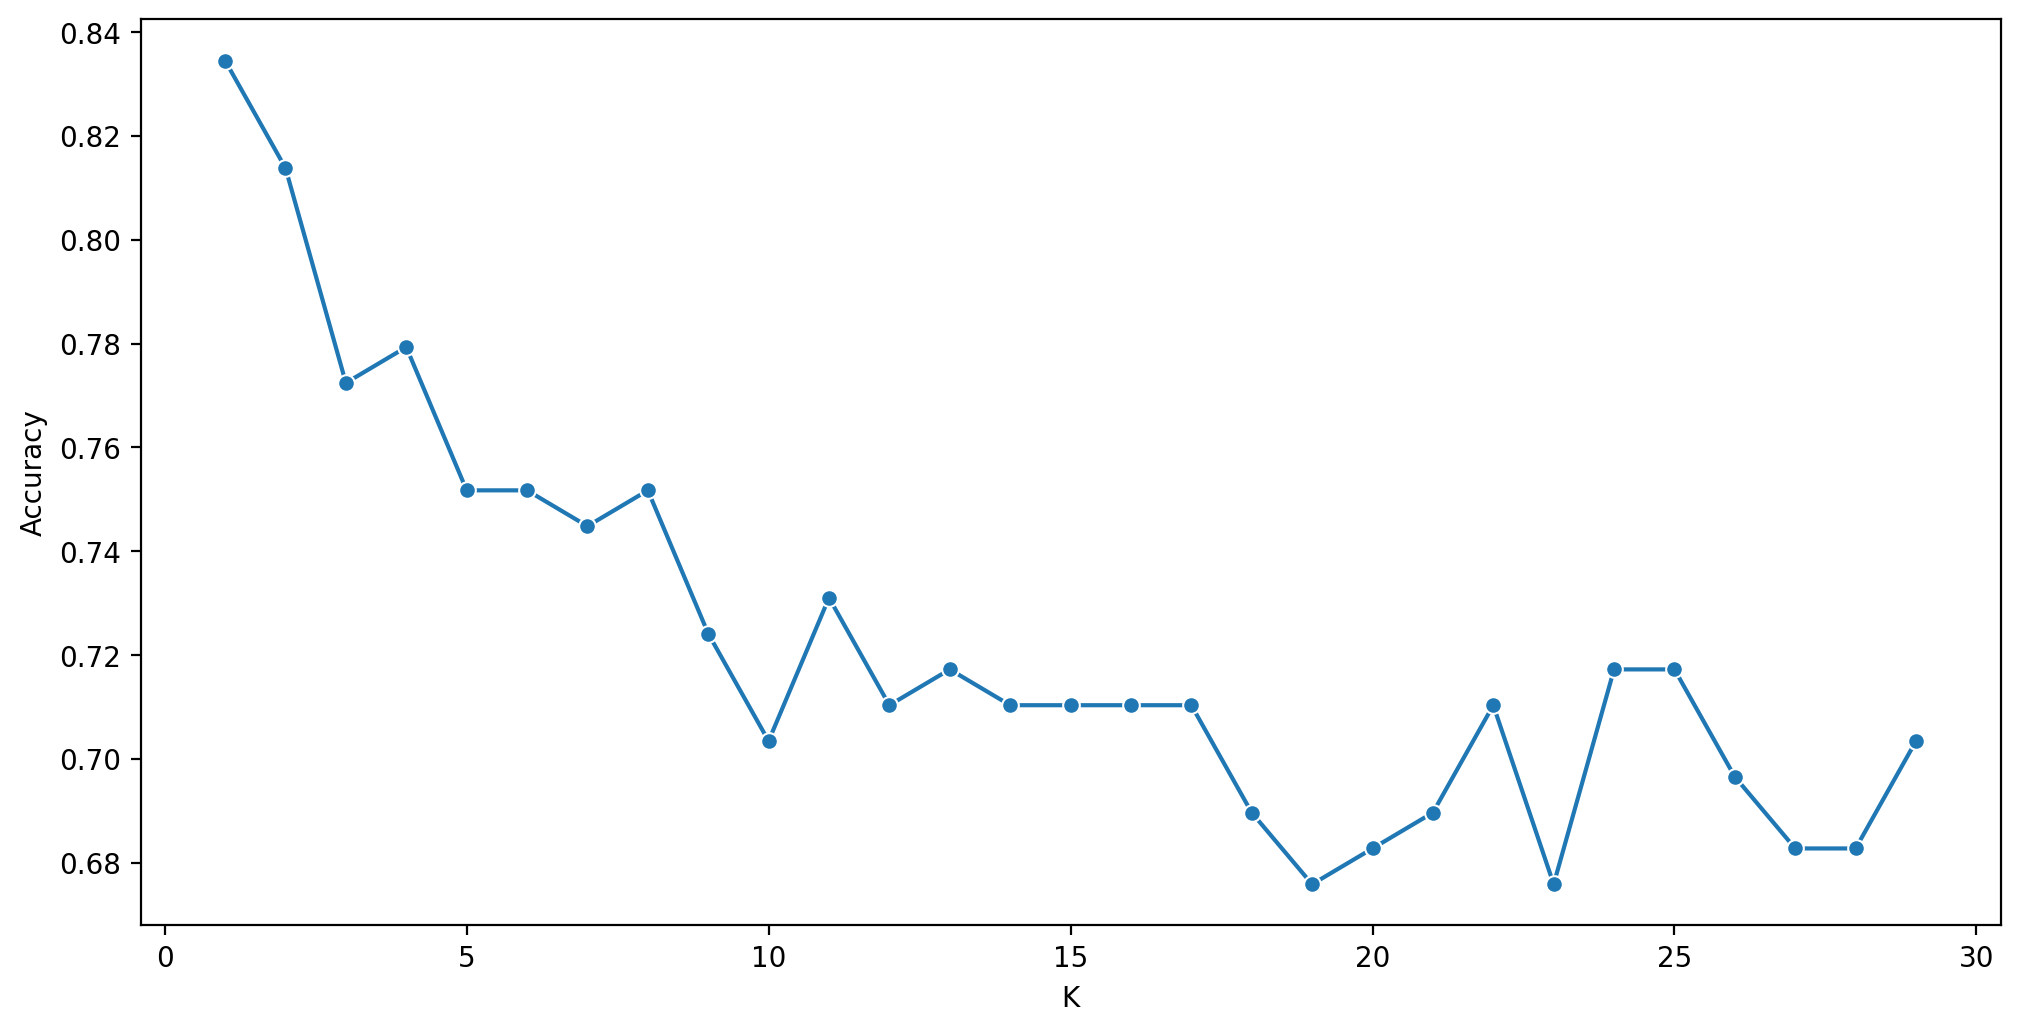

In [15]:
plt.figure(figsize=(12, 6), dpi=200)
sns.lineplot(x=k_values, y=accuracy_k, marker="o")
plt.xlabel("K")
plt.ylabel("Accuracy")

### Performance evaluation

In [16]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

y_pred = grid_model.predict(X_test)

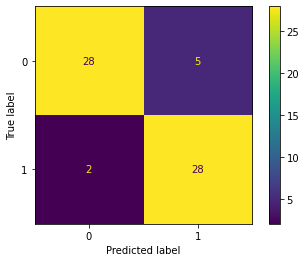

In [17]:
# Confusion matrix

plot_confusion_matrix(grid_model, X_test, y_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.85      0.93      0.89        30

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



In [19]:
accuracy_score(y_test, y_pred)

0.8888888888888888